In [128]:
import numpy as np
import matplotlib.pyplot as plt

The equation is fairly well defined for 2-Body Simulation. It is merely just an application of Newton's laws leading to the following calculation of gravitational force betwen the two bodies;
$$ F = G\frac{m_1 m_2}{r^2} $$
Where F is the gravitational force, m_1 and m_2 are the masses of the objects and r is the distance between the two objects.

One would imagine that the accelation will then be;
$$ A_i = \frac{F}{m_i} $$ 
I think

In [76]:
class Object:
    def __init__(self,mass,location,velocity):
        self.mass = mass
        self.location = location
        self.velocity = velocity
    def updateVelocity(self,velocity):
        self.velocity = velocity
    def getMass(self):
        return self.mass
    def getLocation(self):
        return self.location
    def getVelocity(self):
        return self.velocity
    

In [77]:
A = Object(1,np.array([0,0]),np.array([0.01,0.01]))

In [80]:
B = Object(2,np.array([0.5,0.5]),np.array([-0.01,0.003])) 

In [81]:
G = 6.67408e-11

In [82]:
G

6.67408e-11

In [83]:
Force_Direction = np.linalg.norm(A.getLocation()-B.getLocation())
Force_Direction

0.7071067811865476

In [84]:
F = Force_Direction*G*(A.getMass()*B.getMass()/np.linalg.norm(A.getLocation()-B.getLocation())**2)

In [85]:
A_Acc = F/A.getMass()
A_Acc

1.8877148904726048e-10

In [86]:
B_Acc = F/B.getMass()
B_Acc

9.438574452363024e-11

In [90]:
A.getVelocity() + A_Acc

array([0.01, 0.01])

The below works but I'm not too happy with the Force_Direction method

In [349]:
hmmm = []
hmmm2 = []
Avelocity = np.array([0,0.0001])
Aposition = np.array([0,0])
Bposition = np.array([0.5,0])
Bvelocity = np.array([-0.00005,0.0003])
for i in range(2000):
    timestep = 0.0001
    A = Object(2000000,Aposition,Avelocity)
    B = Object(1,Bposition,Bvelocity) 
    Force_Direction = (A.getLocation()-B.getLocation())/np.linalg.norm(A.getLocation()-B.getLocation())
    F = Force_Direction*G*(A.getMass()*B.getMass()/np.linalg.norm(A.getLocation()-B.getLocation())**2)
    A_Acc = F/A.getMass()
    B_Acc = F/B.getMass()
    A_Update = A.getVelocity()+A_Acc*timestep
    B_Update = B.getVelocity()+B_Acc*timestep
    Avelocity = A_Update
    Bvelocity = B_Update
    Aposition = Aposition + Avelocity
    Bposition = Bposition + Bvelocity
    hmmm.append(Aposition)
    hmmm2.append(Bposition)

In [350]:
hmmm2

[array([4.99949947e-01, 3.00000000e-04]),
 array([0.49989984, 0.0006    ]),
 array([0.49984968, 0.0009    ]),
 array([0.49979947, 0.0012    ]),
 array([0.4997492, 0.0015   ]),
 array([0.49969888, 0.0018    ]),
 array([0.4996485, 0.0021   ]),
 array([0.49959808, 0.0024    ]),
 array([0.4995476, 0.0027   ]),
 array([0.49949706, 0.003     ]),
 array([0.49944647, 0.0033    ]),
 array([0.49939583, 0.00359999]),
 array([0.49934514, 0.00389999]),
 array([0.49929439, 0.00419999]),
 array([0.49924359, 0.00449999]),
 array([0.49919273, 0.00479999]),
 array([0.49914182, 0.00509998]),
 array([0.49909086, 0.00539998]),
 array([0.49903984, 0.00569998]),
 array([0.49898877, 0.00599997]),
 array([0.49893765, 0.00629997]),
 array([0.49888647, 0.00659996]),
 array([0.49883524, 0.00689996]),
 array([0.49878396, 0.00719995]),
 array([0.49873262, 0.00749994]),
 array([0.49868123, 0.00779994]),
 array([0.49862978, 0.00809993]),
 array([0.49857828, 0.00839992]),
 array([0.49852673, 0.00869991]),
 array([0.49

In [351]:
np.array(hmmm2)[:,0]

array([0.49994995, 0.49989984, 0.49984968, ..., 0.29043221, 0.2902776 ,
       0.29012295])

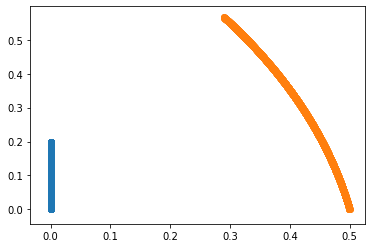

In [352]:
plt.scatter(np.array(hmmm)[:,0],np.array(hmmm)[:,1])
plt.scatter(np.array(hmmm2)[:,0],np.array(hmmm2)[:,1])